# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting6 = pd.read_csv("Results6/bubbleSort-PC6.csv")
dfCounting6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting16 = pd.read_csv("Results16/bubbleSort-PC16.csv")
dfCounting16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting21 = pd.read_csv("Results21/bubbleSort-PC21.csv")
dfCounting21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting23 = pd.read_csv("Results23/bubbleSort-PC23.csv")
dfCounting23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV6 = pd.read_csv("Results6/readCSV-PC6.csv")
dfReadCSV6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV16 = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV21 = pd.read_csv("Results21/readCSV-PC21.csv")
dfReadCSV21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV23 = pd.read_csv("Results23/readCSV-PC23.csv")
dfReadCSV23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

FileNotFoundError: [Errno 2] No such file or directory: 'Results6/bubbleSort-PC6.csv'

## Counting sort

In [2]:
def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

dfC6 = removeNonsense(dfCounting6)
dfC16 = removeNonsense(dfCounting16)
dfC21 = removeNonsense(dfCounting21)
dfC23 = removeNonsense(dfCounting23)


dfR6 = removeNonsense(dfReadCSV6)
dfR16 = removeNonsense(dfReadCSV16)
dfR21 = removeNonsense(dfReadCSV21)
dfR23 = removeNonsense(dfReadCSV23)


In [3]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l

makeinputColumn(dfC6)
makeinputColumn(dfC16)
makeinputColumn(dfC21)
makeinputColumn(dfC23)
print(dfC16)

def makeinputColumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[1].lower())
    df["Input case"] = l
    
makeinputColumn_readCSV(dfR6)
makeinputColumn_readCSV(dfR16)
makeinputColumn_readCSV(dfR21)
makeinputColumn_readCSV(dfR23)


             Test name     PKG (J)     CPU (J) GPU (J)  Memory (J)  \
0      random1-25000-1   13.232300   11.544128            0.399902   
1      random1-25000-1   14.163696   12.361511            0.493103   
2      random1-25000-1   13.530029   11.768127            0.451172   
3      random1-25000-1   14.085632   12.302307            0.486084   
4      random1-25000-1   14.142822   12.376465            0.485718   
...                ...         ...         ...     ...         ...   
11754   worst-500000-1  815.602600  719.116455           18.233643   
11755   worst-500000-1  806.500366  709.628906           19.146301   
11756   worst-500000-1  808.787598  712.215637           18.715515   
11757   worst-500000-1  810.676819  712.063965           20.324219   
11758   worst-500000-1  804.544067  707.847473           18.875793   

       Temperature  Time (ms) Input case  
0               69    1710.16    random1  
1               69    1723.56    random1  
2               69    1730.49 

In [4]:
def makeSizecolumn(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l
makeSizecolumn(dfC6)
makeSizecolumn(dfC16)
makeSizecolumn(dfC21)
makeSizecolumn(dfC23)

def makeSizecolumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[-1]))

    df["Size"] = l

makeSizecolumn_readCSV(dfR6)
makeSizecolumn_readCSV(dfR16)
makeSizecolumn_readCSV(dfR21)
makeSizecolumn_readCSV(dfR23)

In [5]:
print(f"C6: {len(dfC6)}")
print(f"C16: {len(dfC16)}")
print(f"C21: {len(dfC21)}")
print(f"C23: {len(dfC23)}")
print(f"R6: {len(dfR6)}")
print(f"R16: {len(dfR16)}")
print(f"R21: {len(dfR21)}")
print(f"R23: {len(dfR23)}")

C6: 11728
C16: 11727
C21: 11728
C23: 11724
R6: 41599
R16: 41599
R21: 41599
R23: 41599


### remove outliers

In [6]:
def remove_outliers(df, type, size, col):
    q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR
    # print(col)
    # print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
    # print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
    #print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df[col] >= LF]
    return df

In [7]:
def remove_outliers_for_pc(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    col = ["CPU (J)", "Memory (J)", "Temperature","Time (ms)", "PKG (J)"]
    for case in c:
        for size in s:
            for column in col:
                df = remove_outliers(df, case, size, column)
remove_outliers_for_pc(dfC6)
remove_outliers_for_pc(dfC16)
remove_outliers_for_pc(dfC21)
remove_outliers_for_pc(dfC23)
remove_outliers_for_pc(dfR6)
remove_outliers_for_pc(dfR16)
remove_outliers_for_pc(dfR21)
remove_outliers_for_pc(dfR23)

C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\388745506.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\388745506.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\388745506.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]


In [8]:
print(f"C6: {len(dfC6)}")
print(f"C16: {len(dfC16)}")
print(f"C21: {len(dfC21)}")
print(f"C23: {len(dfC23)}")
print(f"R6: {len(dfR6)}")
print(f"R16: {len(dfR16)}")
print(f"R21: {len(dfR21)}")
print(f"R23: {len(dfR23)}")

C6: 11728
C16: 11727
C21: 11728
C23: 11724
R6: 41599
R16: 41599
R21: 41599
R23: 41599


In [9]:
def meanData(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(meanData(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

meanC6 = mean_of_dataset(dfC6)
meanC16 = mean_of_dataset(dfC16)
meanC21 = mean_of_dataset(dfC21)
meanC23 = mean_of_dataset(dfC23)



C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\3314819229.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\3314819229.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\3314819229.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\3314819229.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

In [10]:
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,4.165914,3.652538,0.200856,68.1675,413.64096,25000.0,best
1,7.768649,6.803459,0.293781,65.96,902.304655,50000.0,best
2,16.365787,14.367942,0.496647,62.65,2053.889875,75000.0,best
3,26.71403,23.47995,0.730396,61.59,3436.101,100000.0,best
4,98.830603,87.058202,2.339077,61.38,12994.320525,200000.0,best
...,...,...,...,...,...,...,...
91,145.984242,127.049979,3.671765,59.25,21130.835,100000.0,random10
92,584.390539,508.512553,14.298776,58.666667,85010.907692,200000.0,random10
93,1308.640004,1139.592198,31.693628,60.05,189284.175,300000.0,random10
94,2325.383057,2025.072815,56.276569,60.35,335998.575,400000.0,random10


In [11]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(meanData(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans


meanR6 = mean_of_dataset_readCSV(dfR6)
meanR16 = mean_of_dataset_readCSV(dfR16)
meanR21 = mean_of_dataset_readCSV(dfR21)
meanR23 = mean_of_dataset_readCSV(dfR23)

C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\3314819229.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\3314819229.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\3314819229.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\3314819229.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

In [12]:
meanC6 = meanC6.reset_index(drop=True)
meanC16 = meanC16.reset_index(drop=True)
meanC21 = meanC21.reset_index(drop=True)
meanC23 = meanC23.reset_index(drop=True)
meanR6 = meanR6.reset_index(drop=True)
meanR16 = meanR16.reset_index(drop=True)
meanR21 = meanR21.reset_index(drop=True)
meanR23 = meanR23.reset_index(drop=True)
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,4.165914,3.652538,0.200856,68.1675,413.64096,25000.0,best
1,7.768649,6.803459,0.293781,65.96,902.304655,50000.0,best
2,16.365787,14.367942,0.496647,62.65,2053.889875,75000.0,best
3,26.71403,23.47995,0.730396,61.59,3436.101,100000.0,best
4,98.830603,87.058202,2.339077,61.38,12994.320525,200000.0,best
...,...,...,...,...,...,...,...
91,145.984242,127.049979,3.671765,59.25,21130.835,100000.0,random10
92,584.390539,508.512553,14.298776,58.666667,85010.907692,200000.0,random10
93,1308.640004,1139.592198,31.693628,60.05,189284.175,300000.0,random10
94,2325.383057,2025.072815,56.276569,60.35,335998.575,400000.0,random10


In [13]:
def makeCPU_sub_readCSV(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "sorted"
        if case == "worst":
            case2 = "reversesorted"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append(Cc-Rc)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append(Ct-Rt)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"].index.tolist()[0]]
        lm.append(Cm-Rm)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


makeCPU_sub_readCSV(meanC6, meanR6)
makeCPU_sub_readCSV(meanC16, meanR16)
makeCPU_sub_readCSV(meanC21, meanR21)
makeCPU_sub_readCSV(meanC23, meanR23)



C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\2007257043.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\2007257043.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\2007257043.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\2007257043.py:21: UserWarning: B

In [14]:
print(meanC6[meanC6["Temperature"]<60])
print(meanC16[meanC16["Temperature"]<60])
print(meanC21[meanC21["Temperature"]<60])
print(meanC23[meanC23["Temperature"]<60])

Empty DataFrame
Columns: [PKG (J), CPU (J), Memory (J), Temperature, Time (ms), Size, Input case, CPU - readCSV, Time - readCSV, Memory - readCSV]
Index: []
        PKG (J)      CPU (J) Memory (J) Temperature      Time (ms)      Size  \
17    44.234789    38.477763   1.175876      59.875       6230.186   50000.0   
18    83.607468    72.752005     2.1658        59.1     11996.3875   75000.0   
19   145.158508   126.345915   3.651222      59.475     20998.5725  100000.0   
20   580.055666   504.782801  14.210096   58.435897   84462.489744  200000.0   
21  1306.678018  1137.863435  31.616074      59.125     189104.525  300000.0   
22  2324.511559   2024.16846  56.341845   59.692308  336041.717949  400000.0   
25    44.176122    38.430804     1.1832       59.05     6243.81375   50000.0   
26    83.263176    72.433977   2.151782       58.35     11991.5775   75000.0   
27   145.251828    126.43206   3.684912        59.2     20957.7825  100000.0   
28   579.001607   503.838591  14.189473    

# PLOTS

In [15]:
def plotdf(X, Y, df, case, color):
    for i in range(len(df)):
        if df["Input case"][i].startswith(case):
            plt.plot( df[X][i],df[Y][i],"o", color = color)

In [16]:
def plotdfs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(10,7))

    for df, color in zip(dfs, colors):
        plotdf(X, Y, df, case, color)

    plt.title(title + f" for {case} case")
    for color, pc in zip(colors, ["PC16","PC21","PC23","PC6"]):
        plt.plot(0,0,"", color = color, label = pc)
    plt.legend(loc="upper left")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

In [17]:
listOfDF = [meanC16, meanC21, meanC23, meanC6]
colors = ["red", "green", "blue", "orange"]

In [18]:
def plotRandDFs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(10,7))
    for i in range(1,11):
        for df, color in zip(dfs, colors):
            plotdf(X, Y, df, case+str(i), color)

    plt.title(title + f" for {case} case")
    for color, pc in zip(colors, ["PC16","PC21","PC23","PC6"]):
        plt.plot(0,0,"", color = color, label = pc)
    plt.legend(loc="upper left")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

In [19]:
# case = "random"
# x = "Time (ms)"

# plotRandDFs(x, "CPU (J)", listOfDF, case, colors, "time v cpu")
# plotRandDFs(x, "Memory (J)", listOfDF, case, colors, "time v memory")
# plotRandDFs("Memory (J)", "CPU (J)", listOfDF, case, colors, "mem v cpu")


# BEST

In [20]:

# plotdfs("Size", "CPU - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting CPU for each PC")
# plotdfs("Size", "CPU (J)", listOfDF, "best", colors, "raw CPU (J) data from Counting for each PC")


In [21]:
# plotdfs("Size", "Time - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Time for each PC")
# plotdfs("Size", "Time (ms)", listOfDF, "best", colors, "raw Time (ms) data from Counting for each PC")

In [22]:
# plotdfs("Size", "Memory - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Memory for each PC")
# plotdfs("Size", "Memory (J)", listOfDF, "best", colors, "raw Memory (J) data from Counting for each PC")

In [23]:
# plotdfs("Size", "Temperature", listOfDF, "best", colors, "Temperature of Counting for each PC")

# WORST

In [24]:
# plotdfs("Size", "CPU - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting CPU for each PC")
# plotdfs("Size", "CPU (J)", listOfDF, "worst", colors, "raw CPU (J) data from Counting for each PC")

In [25]:
# plotdfs("Size", "Time - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Time for each PC")
# plotdfs("Size", "Time (ms)", listOfDF, "worst", colors, "raw Time (ms) data from Counting for each PC")

In [26]:
# plotdfs("Size", "Memory - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Memory for each PC")
# plotdfs("Size", "Memory (J)", listOfDF, "worst", colors, "raw Memory (J) data from Counting for each PC")

In [27]:
# plotdfs("Size", "Temperature", listOfDF, "worst", colors, "Temperature of Counting for each PC")

# RANDOM

In [28]:

# plotRandDFs("Size", "CPU - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting CPU for each PC")
# plotRandDFs("Size", "CPU (J)", listOfDF, "random", colors, "raw CPU (J) data from Counting for each PC")


In [29]:

# plotRandDFs("Size", "Time - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Time for each PC")
# plotRandDFs("Size", "Time (ms)", listOfDF, "random", colors, "raw Time (ms) data from Counting for each PC")


In [30]:

# plotRandDFs("Size", "Memory - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Memory for each PC")
# plotRandDFs("Size", "Memory (J)", listOfDF, "random", colors, "raw Memory (J) data from Counting for each PC")


In [31]:

# plotRandDFs("Size", "Temperature", listOfDF, "random", colors, "Temperature of Counting for each PC")


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, printR2Score = True, plotGraph = True):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.scatter(X, y, color=color, label=Label)
        if dg ==1:
            plt.plot(X, y_poly, color=color, label = f"Linear regression", linewidth=2)
        else:
            plt.plot(X, y_poly, color=color, label = f"{dg}. dg polynomial regression", linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))
        


-1321.7374213836156 [0.00000000e+00 3.45053758e-02 1.62462715e-07]
103.4934669659524 [ 0.00000000e+00 -1.53448190e-03  4.30711323e-07]
Best: 0.9974874277243972  Worst: 0.9999992481369099


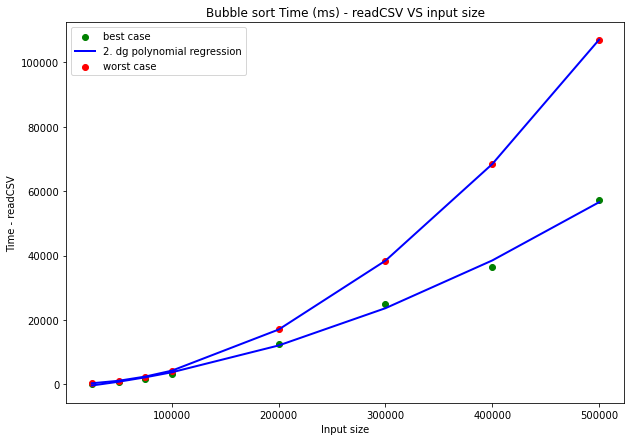

In [33]:
plt.figure(figsize=(10,7))
best = polyReg(meanC16[meanC16["Input case"] == "best"]["Size"], meanC16[meanC16["Input case"] == "best"]["Time - readCSV"], 2,"best case", "green")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["Size"], meanC16[meanC16["Input case"] == "worst"]["Time - readCSV"], 2,"worst case", "red")
print(f"Best: {best[1]}  Worst: {worst[1]}")
plt.xlabel("Input size")
plt.ylabel("Time - readCSV")
plt.title("Bubble sort Time (ms) - readCSV VS input size")
plt.show()

In [34]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


In [41]:
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    size2 = []
    for case in ["best", "worst", "random"]:
        if case != "random":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                size2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    size2.append(df["Size"][getIndex(df,case+str(i),size)] * df["Size"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["Size^2"] = size2

In [42]:
for df in listOfDF:
    calcPercent(df)

C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\mathi\AppData\Local\Temp\ipykernel_89180\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


In [37]:

def plotStack(df, case, dfName, top, bottom):
    plt.figure(figsize=(10,7))
    cpu = sns.lineplot(df[df["Input case"] == case]["Size"], top, color="red")
    pkg = sns.lineplot(df[df["Input case"] == case]["Size"], bottom, color="green")
    cpuLine = cpu.lines[0]
    pkgLine = pkg.lines[0]

    cpuX = cpuLine.get_xydata()[:, 0]
    cpuY = cpuLine.get_xydata()[:, 1]
    pkgX = pkgLine.get_xydata()[:, 0]
    pkgY = pkgLine.get_xydata()[:, 1]

    cpu.fill_between(cpuX, cpuY, color="red", alpha=1)
    cpu.margins(x=0, y=0)
    pkg.fill_between(pkgX, pkgY, color="green", alpha=0.3)
    pkg.margins(x=0, y=0)
    
    
    
    #plt.ylim(0,110)
    plt.title(f"Buble sort EC distribution between CPU and Memory for {dfName} for {case} case")
    plt.xlabel("Input size")
    plt.ylabel("Joule")
    plt.show()


0.2718816016992065 [0.         0.00678851]
0.9999971851803315
0.2744979663217464 [0.        0.0067781]
0.9999985503072649


Text(0.5, 1.0, 'Bubble sort full EC v time for PC16 for best case')

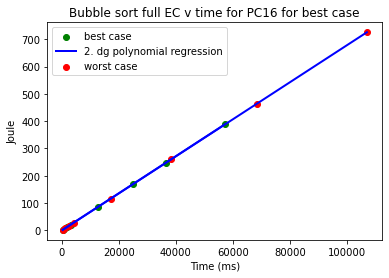

In [38]:
print(polyReg(meanC16[meanC16["Input case"] == "best"]["Time - readCSV"], meanC16[meanC16["Input case"] == "best"]["full EC"], 1,"best case", "green")[1])
print(polyReg(meanC16[meanC16["Input case"] == "worst"]["Time - readCSV"], meanC16[meanC16["Input case"] == "worst"]["full EC"], 1,"worst case", "red")[1])
plt.xlabel("Time (ms)")
plt.ylabel("Joule")
plt.title("Bubble sort full EC v time for PC16 for best case")

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


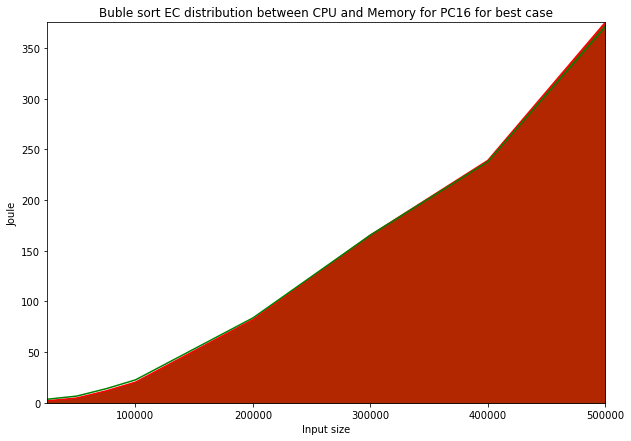

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


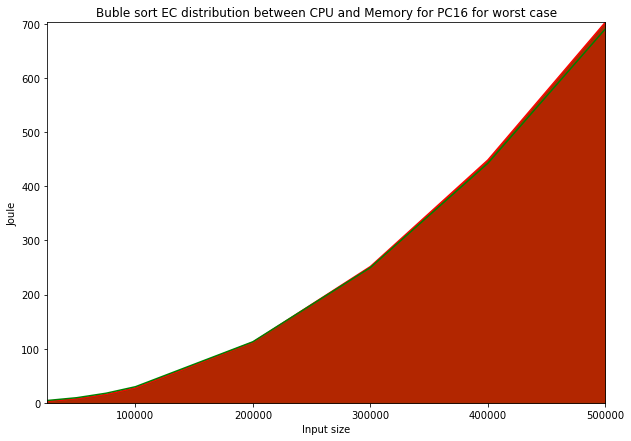

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


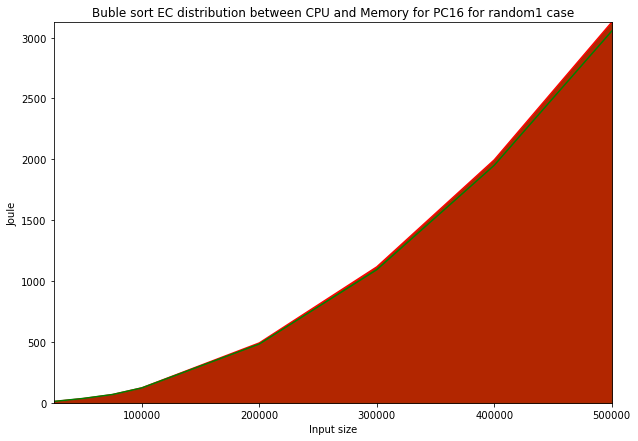

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


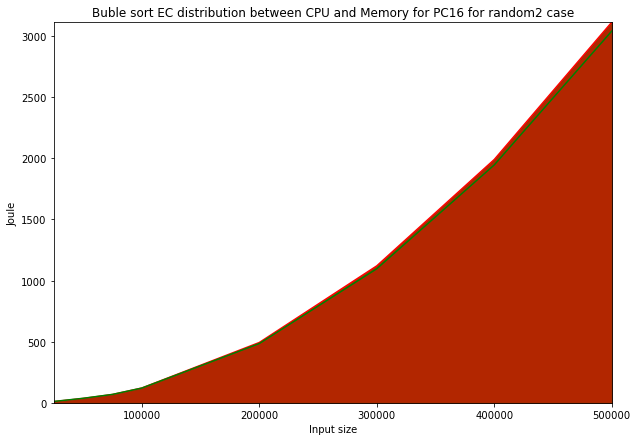

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


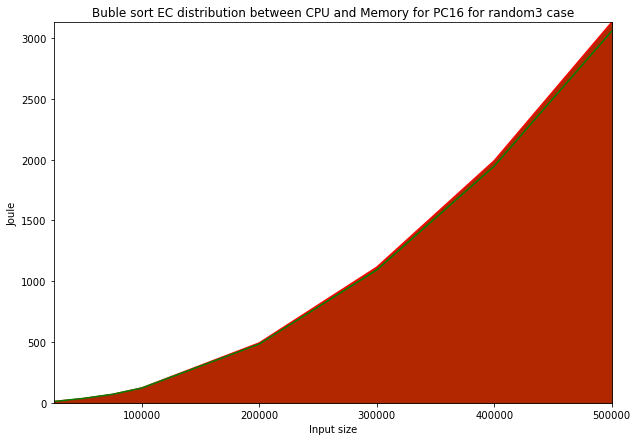

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


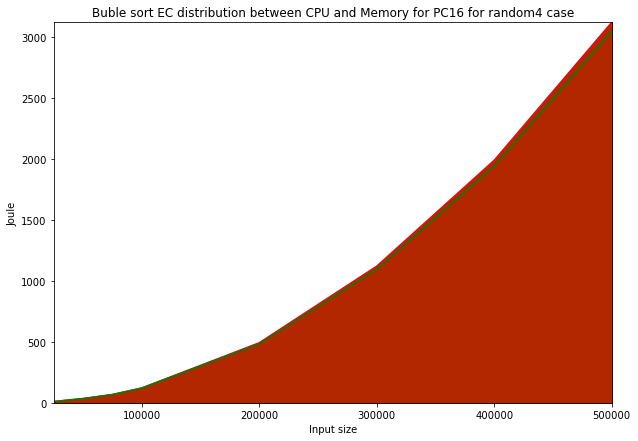

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


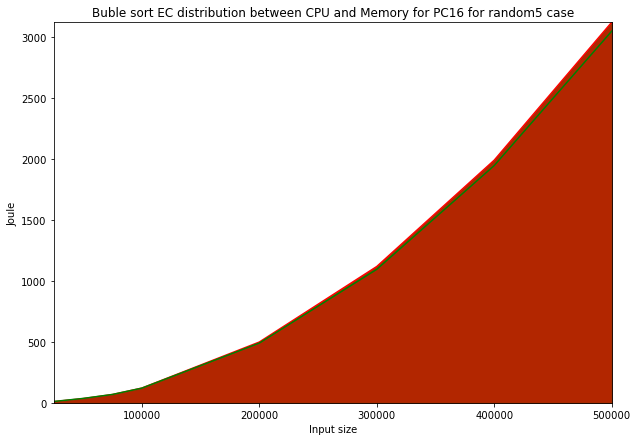

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


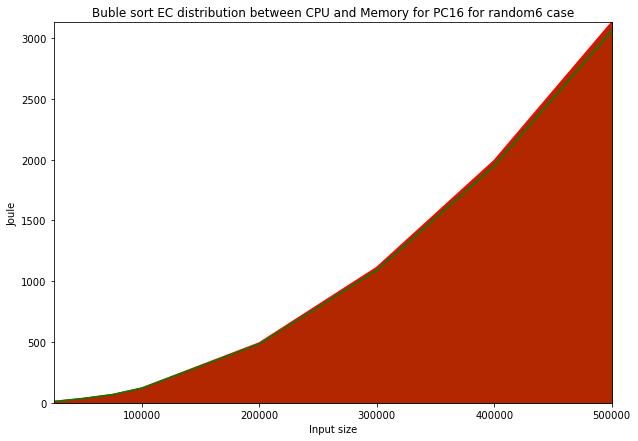

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


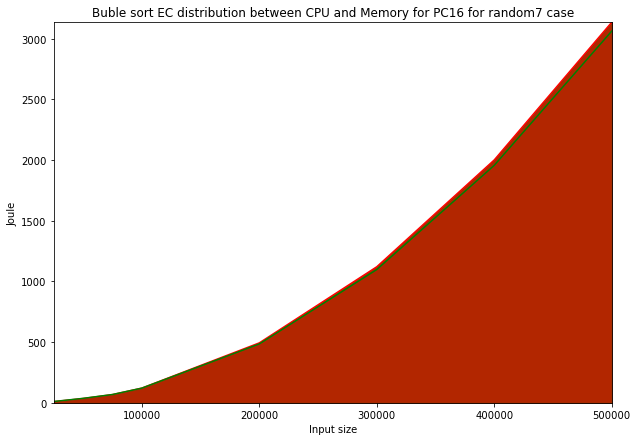

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


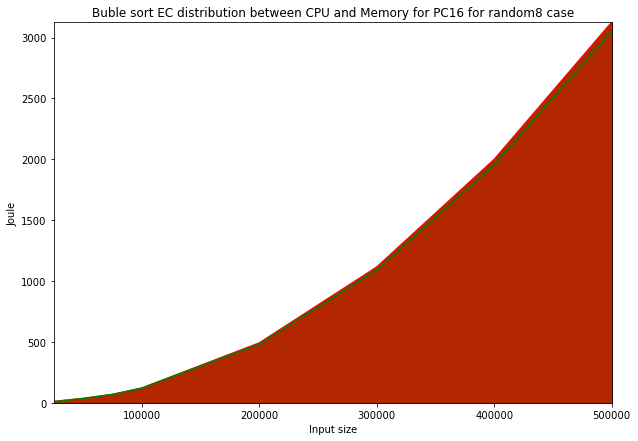

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


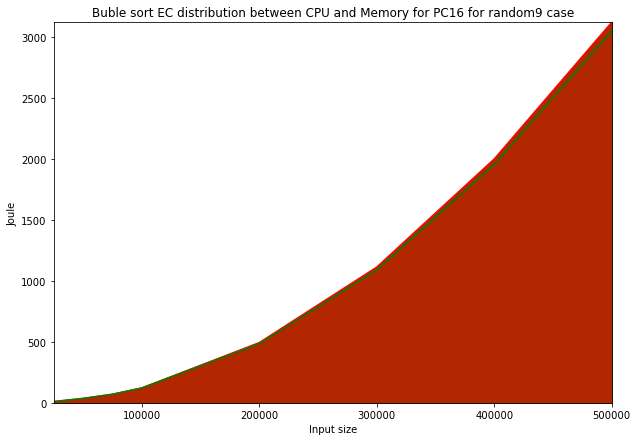

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


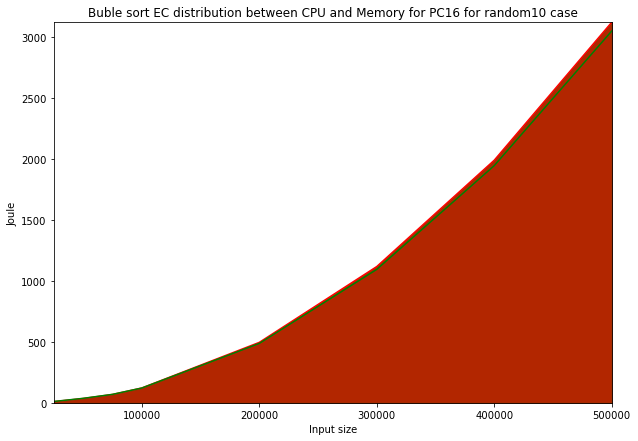

In [39]:
for case in ["best", "worst", "random"]:
        if case != "random":
            plotStack(meanC16, case, "PC16", df[df["Input case"] == case]["full EC"], df[df["Input case"] == case]["CPU (J)"])
        else :
            for i in range(1,11):
                plotStack(meanC16, case+str(i), "PC16",df[df["Input case"] == case+str(i)]["full EC"], df[df["Input case"] == case+str(i)]["CPU (J)"] )

# Time vs big-oh

random0 R2 0.9999963664210008  

random1 R2 0.9999961520113929  

random2 R2 0.9999972995601651  

random3 R2 0.9999959433536605  

random4 R2 0.9999952295743364  

random5 R2 0.9999945589400485  

random6 R2 0.9999975421220568  

random7 R2 0.9999981067477772  

random8 R2 0.999997232869706  

random9 R2 0.9999961820311717  

worst R2  0.9999966601938999 

best R2  0.99287518842042 



Text(0, 0.5, 'Time (ms)')

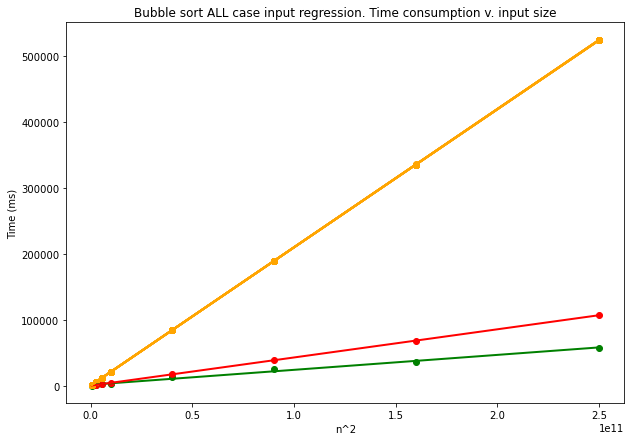

In [84]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(meanC16[meanC16["Input case"] == "best"]["Size^2"], meanC16[meanC16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["Size^2"], meanC16[meanC16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "red")
for i in range(1,11):
    Rs.append(polyReg(meanC16[meanC16["Input case"] == f"random{i}"]["Size^2"], meanC16[meanC16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "orange"))
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort ALL case input regression. Time consumption v. input size")
plt.xlabel("n^2")
plt.ylabel("Time (ms)")


# E v. T


random0 R2 0.9999974848542207  

random1 R2 0.9999970041736099  

random2 R2 0.9999977487814824  

random3 R2 0.9999945692419157  

random4 R2 0.9999973193762157  

random5 R2 0.9999976586572132  

random6 R2 0.9999975323252608  

random7 R2 0.9999981867209095  

random8 R2 0.99999785167184  

random9 R2 0.9999972456159067  

worst R2  0.9999985503072649 

best R2  0.9999971851803315 



Text(0.5, 0, 'Time (ms)')

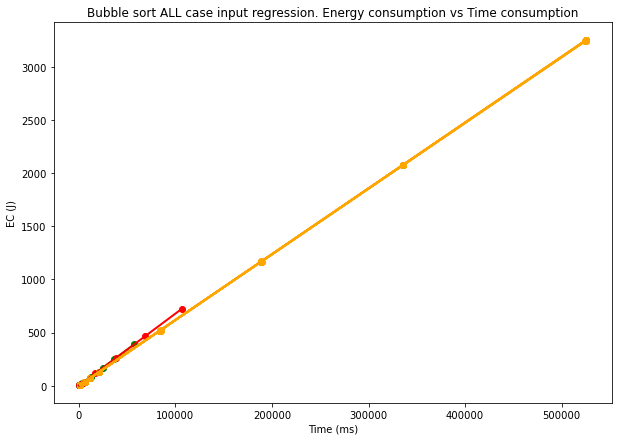

In [85]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(meanC16[meanC16["Input case"] == "best"]["Time - readCSV"], meanC16[meanC16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["Time - readCSV"], meanC16[meanC16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "red")
for i in range(1,11):
    Rs.append(polyReg(meanC16[meanC16["Input case"] == f"random{i}"]["Time - readCSV"], meanC16[meanC16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "orange"))
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort ALL case input regression. Energy consumption vs Time consumption")
plt.ylabel("EC (J)")
plt.xlabel("Time (ms)")


# EC v. big-oh

random0 R2 0.9999920202200402  

random1 R2 0.9999903514971538  

random2 R2 0.9999942161147258  

random3 R2 0.9999883758512982  

random4 R2 0.9999948794691742  

random5 R2 0.9999954087785494  

random6 R2 0.9999930866148871  

random7 R2 0.999995157748892  

random8 R2 0.9999949460570786  

random9 R2 0.9999965825923737  

worst R2  0.9999948036528569 

best R2  0.9930495305513037 



Text(0, 0.5, 'EC (J)')

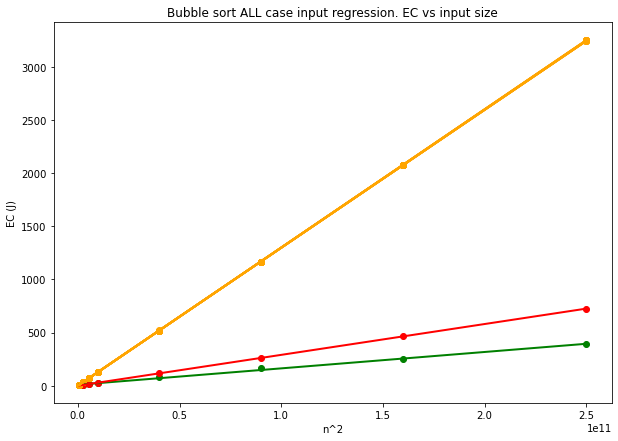

In [86]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(meanC16[meanC16["Input case"] == "best"]["Size^2"], meanC16[meanC16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["Size^2"], meanC16[meanC16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "red")
for i in range(1,11):
    Rs.append(polyReg(meanC16[meanC16["Input case"] == f"random{i}"]["Size^2"], meanC16[meanC16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "orange"))
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort ALL case input regression. EC vs input size")
plt.xlabel("n^2")
plt.ylabel("EC (J)")
